In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np


Завантаження датасету IMDb

In [6]:
max_features = 10000  
maxlen = 500  

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [7]:
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

RNN

In [8]:
def build_rnn_model():
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
        layers.SimpleRNN(32, return_sequences=False),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

rnn_model = build_rnn_model()
history_rnn = rnn_model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

test_loss_rnn, test_acc_rnn = rnn_model.evaluate(test_data, test_labels, verbose=2)
print(f'\nТочність на тестовому наборі даних (RNN): {test_acc_rnn}')

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 136ms/step - accuracy: 0.6050 - loss: 0.6405 - val_accuracy: 0.8292 - val_loss: 0.4050
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - accuracy: 0.8524 - loss: 0.3518 - val_accuracy: 0.8445 - val_loss: 0.3600
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.9126 - loss: 0.2353 - val_accuracy: 0.8397 - val_loss: 0.4130
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 91s 148ms/step - accuracy: 0.9402 - loss: 0.1683 - val_accuracy: 0.8512 - val_loss: 0.4145
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - accuracy: 0.9480 - loss: 0.1514 - val_accuracy: 0.6924 - val_loss: 0.6351
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 147ms/step - accuracy: 0.8245 - loss: 0.4003 - val_accuracy: 0.6556 - val_loss: 0.7412
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 148ms/step - accuracy: 0.9037 - loss: 0.2369 - val_accuracy: 0.7557 - val_loss: 0.6478
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 147ms/step - accuracy: 0.9693 - loss: 0

LSTM

In [9]:

def build_lstm_model():
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
        layers.LSTM(32, return_sequences=False),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

lstm_model = build_lstm_model()
history_lstm = lstm_model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

test_loss_lstm, test_acc_lstm = lstm_model.evaluate(test_data, test_labels, verbose=2)
print(f'\nТочність на тестовому наборі даних (LSTM): {test_acc_lstm}')

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 288ms/step - accuracy: 0.7000 - loss: 0.5535 - val_accuracy: 0.8652 - val_loss: 0.3322
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 309ms/step - accuracy: 0.9028 - loss: 0.2540 - val_accuracy: 0.8551 - val_loss: 0.3336
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 346ms/step - accuracy: 0.9323 - loss: 0.1895 - val_accuracy: 0.8679 - val_loss: 0.3129
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 355ms/step - accuracy: 0.9480 - loss: 0.1551 - val_accuracy: 0.8612 - val_loss: 0.3662
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 357ms/step - accuracy: 0.9489 - loss: 0.1496 - val_accuracy: 0.8691 - val_loss: 0.3612
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 356ms/step - accuracy: 0.9657 - loss: 0.1066 - val_accuracy: 0.8583 - val_loss: 0.4613
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 357ms/step - accuracy: 0.9682 - loss: 0.1000 - val_accuracy: 0.8572 - val_loss: 0.5145
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 358ms/step - accuracy: 0.9710 -

Двостороння модель LSTM

In [10]:

def build_bidirectional_lstm_model():
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
        layers.Bidirectional(layers.LSTM(32, return_sequences=False)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

bidirectional_lstm_model = build_bidirectional_lstm_model()
history_bidirectional_lstm = bidirectional_lstm_model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

test_loss_bidirectional_lstm, test_acc_bidirectional_lstm = bidirectional_lstm_model.evaluate(test_data, test_labels, verbose=2)
print(f'\nТочність на тестовому наборі даних (Bidirectional LSTM): {test_acc_bidirectional_lstm}')

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 361ms/step - accuracy: 0.6740 - loss: 0.5796 - val_accuracy: 0.8526 - val_loss: 0.3537
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 378ms/step - accuracy: 0.8856 - loss: 0.2851 - val_accuracy: 0.8766 - val_loss: 0.3095
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 368ms/step - accuracy: 0.9277 - loss: 0.1975 - val_accuracy: 0.8759 - val_loss: 0.2976
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 136s 347ms/step - accuracy: 0.9394 - loss: 0.1688 - val_accuracy: 0.8646 - val_loss: 0.3355
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 298ms/step - accuracy: 0.9605 - loss: 0.1215 - val_accuracy: 0.8747 - val_loss: 0.3819
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 286ms/step - accuracy: 0.9686 - loss: 0.0955 - val_accuracy: 0.8648 - val_loss: 0.3728
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 333ms/step - accuracy: 0.9471 - loss: 0.1416 - val_accuracy: 0.8684 - val_loss: 0.4137
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 364ms/step - accuracy: 0.9784 -

Глибинна модель LSTM

In [12]:
def build_deep_lstm_model():
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(32, return_sequences=False),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

deep_lstm_model = build_deep_lstm_model()
history_deep_lstm = deep_lstm_model.fit(train_data, train_labels, epochs=4, batch_size=64, validation_data=(test_data, test_labels))

test_loss_deep_lstm, test_acc_deep_lstm = deep_lstm_model.evaluate(test_data, test_labels, verbose=2)
print(f'\nТочність на тестовому наборі даних (Deep LSTM): {test_acc_deep_lstm}')

Epoch 1/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 606ms/step - accuracy: 0.7019 - loss: 0.5462 - val_accuracy: 0.8398 - val_loss: 0.3738
Epoch 2/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 231s 591ms/step - accuracy: 0.8708 - loss: 0.3170 - val_accuracy: 0.8668 - val_loss: 0.3197
Epoch 3/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 234s 599ms/step - accuracy: 0.8970 - loss: 0.2617 - val_accuracy: 0.8243 - val_loss: 0.3921
Epoch 4/4
391/391 ━━━━━━━━━━━━━━━━━━━━ 237s 607ms/step - accuracy: 0.9140 - loss: 0.2204 - val_accuracy: 0.8617 - val_loss: 0.3778
782/782 - 70s - 89ms/step - accuracy: 0.8617 - loss: 0.3778

Точність на тестовому наборі даних (Deep LSTM): 0.8617200255393982


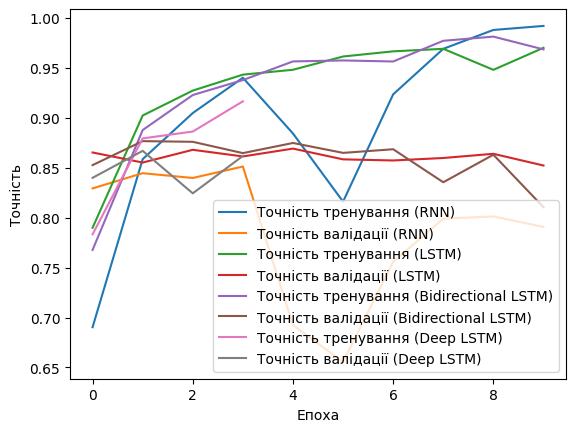


Точність на тестовому наборі даних (RNN): 0.7907199859619141

Точність на тестовому наборі даних (LSTM): 0.8521599769592285

Точність на тестовому наборі даних (Bidirectional LSTM): 0.8104400038719177

Точність на тестовому наборі даних (Deep LSTM): 0.8617200255393982


In [13]:
plt.plot(history_rnn.history['accuracy'], label='Точність тренування (RNN)')
plt.plot(history_rnn.history['val_accuracy'], label='Точність валідації (RNN)')
plt.plot(history_lstm.history['accuracy'], label='Точність тренування (LSTM)')
plt.plot(history_lstm.history['val_accuracy'], label='Точність валідації (LSTM)')
plt.plot(history_bidirectional_lstm.history['accuracy'], label='Точність тренування (Bidirectional LSTM)')
plt.plot(history_bidirectional_lstm.history['val_accuracy'], label='Точність валідації (Bidirectional LSTM)')
plt.plot(history_deep_lstm.history['accuracy'], label='Точність тренування (Deep LSTM)')
plt.plot(history_deep_lstm.history['val_accuracy'], label='Точність валідації (Deep LSTM)')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.show()


print(f'\nТочність на тестовому наборі даних (RNN): {test_acc_rnn}')
print(f'\nТочність на тестовому наборі даних (LSTM): {test_acc_lstm}')
print(f'\nТочність на тестовому наборі даних (Bidirectional LSTM): {test_acc_bidirectional_lstm}')
print(f'\nТочність на тестовому наборі даних (Deep LSTM): {test_acc_deep_lstm}')